In [1]:
import pandas as pd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import math
from scipy.signal import find_peaks

In [3]:
##Cargar EEG ABIERTOS
df_Aeeg = pd.read_excel("D_P_Abiertos_T_1.xlsx")
rango_a=7499
rango_b=(df_Aeeg['EEGAF3'].size)
df_Aeeg = df_Aeeg.drop(df_Aeeg.index[range(rango_a,rango_b)])
df_Aeeg=df_Aeeg.drop(["EEGCounter","OriginalTimestamp","EEG.Counter","EEGInterpolated","Timestamp","EEGRawCq", "EEGBattery","EEGBatteryPercent","MarkerIndex","MarkerType","MarkerValueInt","EEGMarkerHardware","CQAF3","CQF7","CQF3","CQFC5","CQT7","CQP7","CQO1","CQO2","CQP8","CQT8","CQFC6","CQF4","CQF8","CQAF4","CQOverall","EQSampleRateQuality","EQOVERALL","EQAF3","EQF7","EQF3","EQFC5","EQT7","EQP7","EQO1","EQO2","EQP8","EQT8","EQFC6","EQF4","EQF8","EQAF4","PMEngagementIsActive","PMEngagementScaled","PMEngagementRaw","PMEngagementMin","PMEngagementMax","PMExcitementIsActive","PMExcitementScaled","PMExcitementRaw","PMExcitementMin","PMExcitementMax","PMLongTermExcitement","PMStressIsActive","PMStressScaled","PMStressRaw","PMStressMin","PMStressMax","PMRelaxationIsActive","PMRelaxationScaled","PMRelaxationRaw","PMRelaxationMin","PMRelaxationMax","PMInterestIsActive","PMInterestScaled","PMInterestRaw","PMInterestMin","PMInterestMax","PMFocusIsActive","PMFocusScaled","PMFocusRaw","PMFocusMin","PMFocusMax","POWAF3Theta","POWAF3Alpha","POWAF3BetaL","POWAF3BetaH","POWAF3Gamma","POWF7Theta","POWF7Alpha","POWF7BetaL","POWF7BetaH","POWF7Gamma","POWF3Theta","POWF3Alpha","POWF3BetaL","POWF3BetaH","POWF3Gamma","POWFC5Theta","POWFC5Alpha","POWFC5BetaL","POWFC5BetaH","POWFC5Gamma","POWT7Theta","POWT7Alpha","POWT7BetaL","POWT7BetaH","POWT7Gamma","POWP7Theta","POWP7Alpha","POWP7BetaL","POWP7BetaH","POWP7Gamma","POWO1Theta","POWO1Alpha","POWO1BetaL","POWO1BetaH","POWO1Gamma","POWO2Theta","POWO2Alpha","POWO2BetaL","POWO2BetaH","POWO2Gamma","POWP8Theta","POWP8Alpha","POWP8BetaL","POWP8BetaH","POWP8Gamma","POWT8Theta","POWT8Alpha","POWT8BetaL","POWT8BetaH","POWT8Gamma","POWFC6Theta","POWFC6Alpha","POWFC6BetaL","POWFC6BetaH","POWFC6Gamma","POWF4Theta","POWF4Alpha","POWF4BetaL","POWF4BetaH","POWF4Gamma","POWF8Theta","POWF8Alpha","POWF8BetaL","POWF8BetaH","POWF8Gamma","POWAF4Theta","POWAF4Alpha","POWAF4BetaL","POWAF4BetaH","POWAF4Gamma"],axis= 1, errors='ignore')

df_Aeeg

,EEGAF3,EEGF7,EEGF3,EEGFC5,EEGT7,EEGP7,EEGO1,EEGO2,EEGP8,EEGT8,EEGFC6,EEGF4,EEGF8,EEGAF4
0,4097.436035,4169.743652,4123.077148,4140.512695,4145.641113,4137.948730,4139.487305,4138.974121,4133.333496,4106.153809,4092.307617,4109.230957,4048.205078,4080.000000
1,4082.051270,4169.743652,4123.077148,4137.948730,4141.025879,4136.410156,4138.461426,4138.461426,4135.897461,4100.512695,4094.358887,4099.487305,4053.846191,4074.358887
2,4080.512939,4165.641113,4123.077148,4135.897461,4145.128418,4137.948730,4137.948730,4128.717773,4137.948730,4103.589844,4090.256348,4095.384521,4057.948730,4074.871826
3,4081.538574,4164.615234,4120.512695,4135.384766,4147.692383,4136.410156,4135.384766,4125.641113,4135.384766,4107.692383,4088.718018,4101.025879,4058.974365,4077.435791
4,4081.025635,4168.205078,4123.589844,4138.461426,4153.846191,4138.974121,4136.410156,4134.871582,4137.948730,4109.743652,4093.846191,4110.769043,4060.512939,4074.358887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7494,4170.769043,4122.051270,4138.461426,4126.153809,4145.641113,4146.153809,4152.820313,4151.794922,4143.589844,4137.436035,4143.077148,4127.692383,4121.025879,4127.179688
7495,4170.769043,4122.051270,4138.461426,4127.179688,4142.563965,4141.538574,4146.666504,4150.256348,4143.077148,4137.436035,4140.512695,4126.153809,4118.974121,4135.897461
7496,4169.743652,4122.051270,4140.512695,4127.692383,4140.000000,4141.025879,4143.077148,4149.743652,4143.589844,4137.948730,4141.538574,4126.153809,4125.128418,4141.538574
7497,4170.256348,4114.871582,4140.512695,4125.128418,4140.000000,4140.000000,4144.615234,4145.128418,4143.589844,4137.948730,4142.563965,4129.230957,4122.051270,4134.358887


Text(0.5, 1.0, 'Canal AF4')

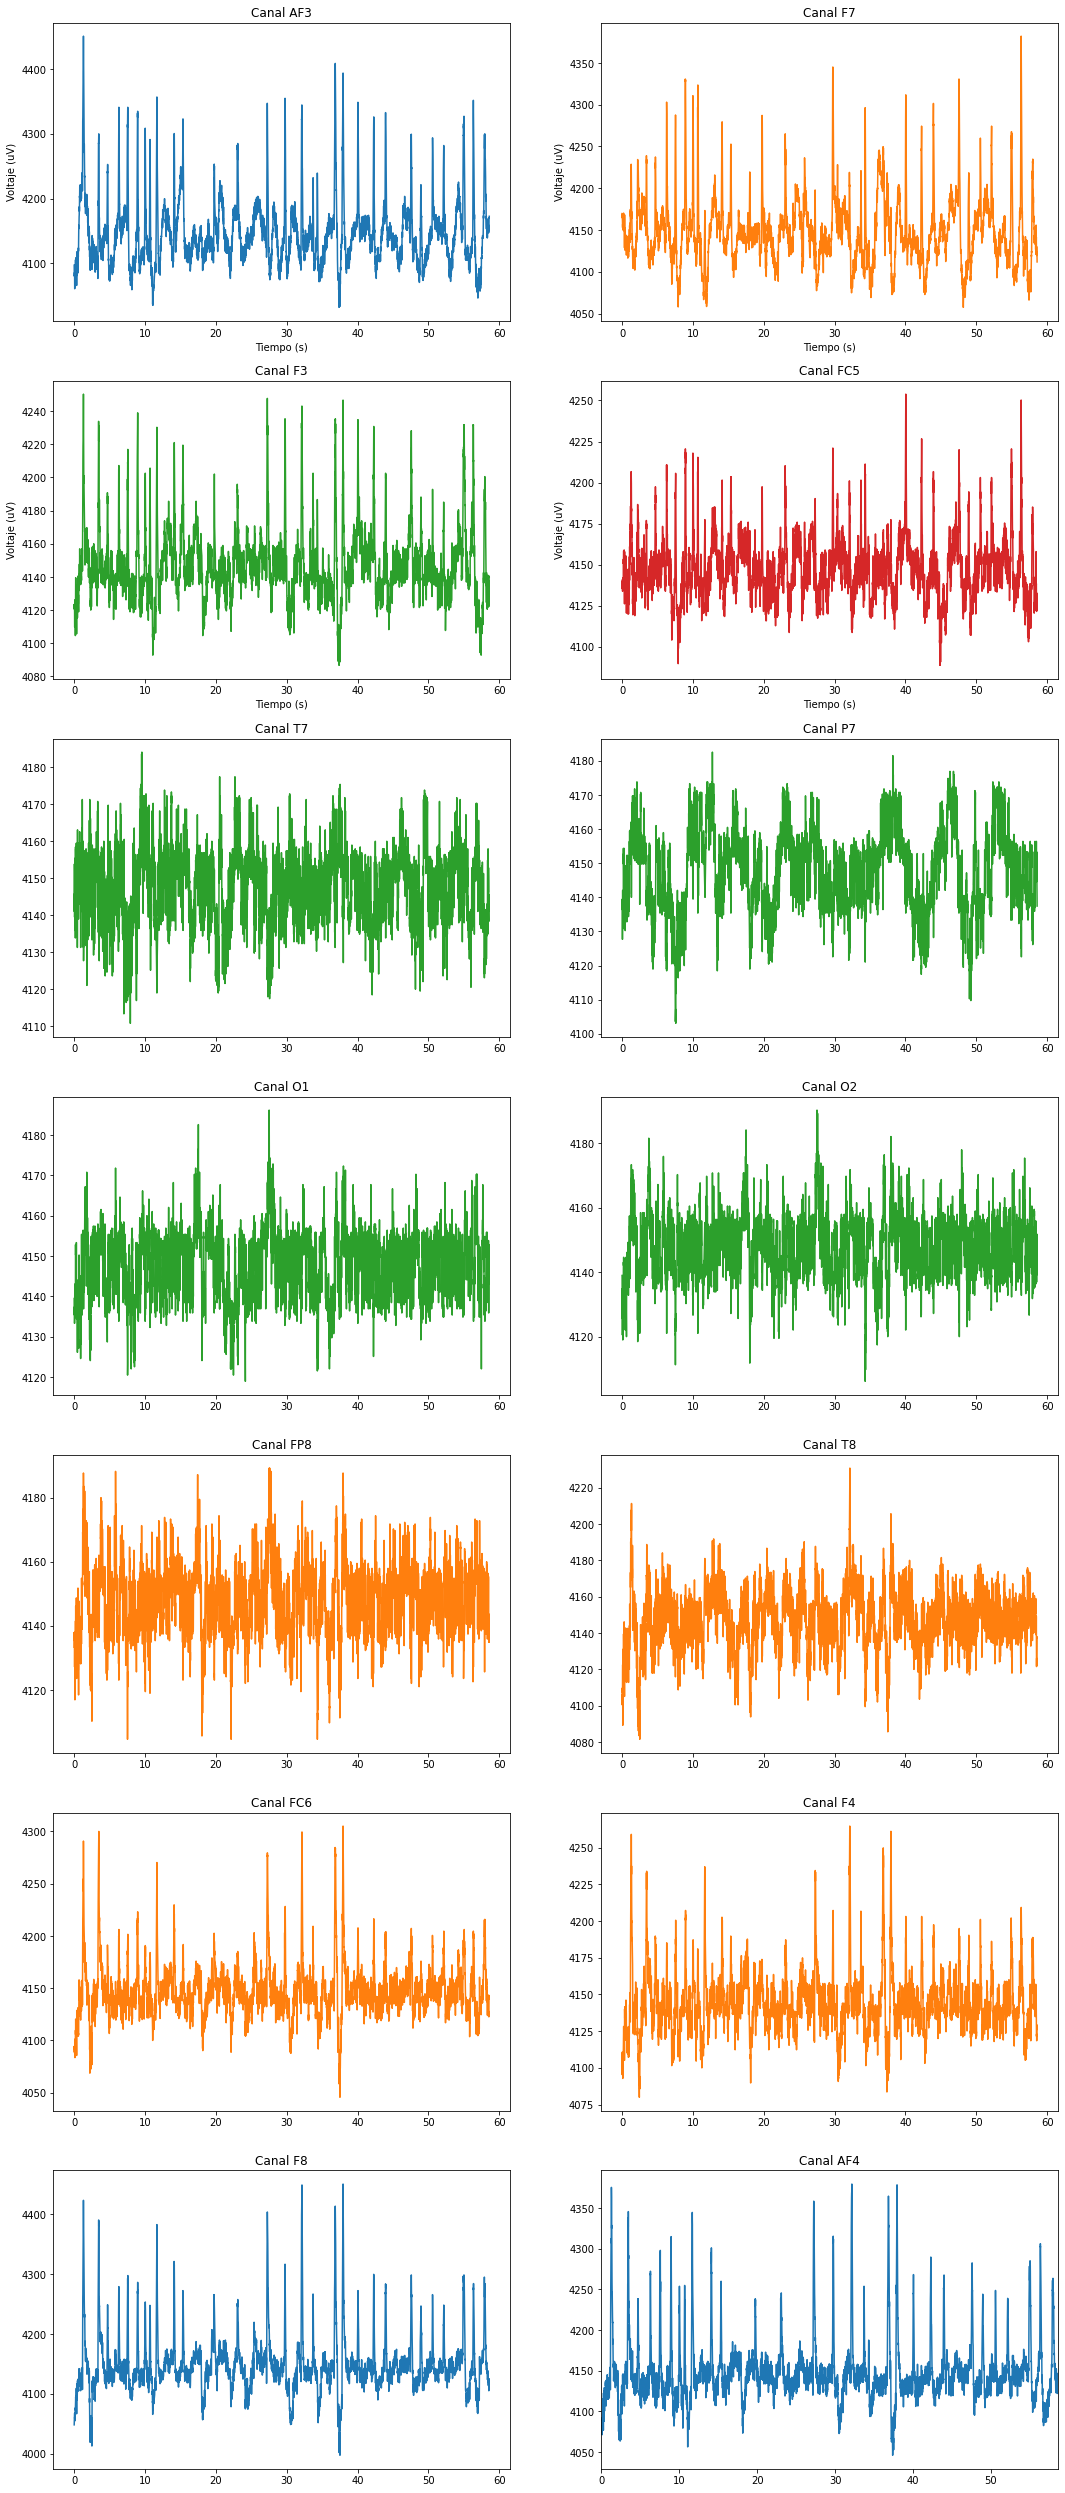

In [10]:
sf = 128 #frecuencia de sample
canal_1	= df_Aeeg['EEGAF3']
canal_2  = df_Aeeg['EEGF7']
canal_3  = df_Aeeg['EEGF3']
canal_4  = df_Aeeg['EEGFC5']

canal_5 = df_Aeeg['EEGT7']
canal_6  = df_Aeeg['EEGP7']
canal_7  = df_Aeeg['EEGO1']
canal_8  = df_Aeeg['EEGO2']

canal_9  = df_Aeeg['EEGP8']
canal_10  = df_Aeeg['EEGT8']
canal_11  = df_Aeeg['EEGFC6']
canal_12  = df_Aeeg['EEGF4']

canal_13  = df_Aeeg['EEGF8']
canal_14  = df_Aeeg['EEGAF4']

												
tiempo = np.arange(canal_1.size)/sf ##Tamano Canal 

#t=tiempo.size
#sns.set(font_scale=1.2, style='dark')
fig, axs = plt.subplots(7, 2, figsize=(18, 45))

axs[0, 0].plot(tiempo, canal_1)
plt.xlim([tiempo.min(), tiempo.max()])
axs[0, 0].set_title('Canal AF3')
axs[0,0].set(xlabel="Tiempo (s)", ylabel="Voltaje (uV)")

axs[0, 1].plot(tiempo, canal_2, 'tab:orange')
plt.xlim([tiempo.min(), tiempo.max()])
axs[0, 1].set_title('Canal F7')
axs[0,1].set(xlabel="Tiempo (s)", ylabel="Voltaje (uV)")

axs[1, 0].plot(tiempo, canal_3, 'tab:green')
plt.xlim([tiempo.min(), tiempo.max()])
axs[1, 0].set_title('Canal F3')
axs[1,0].set(xlabel="Tiempo (s)", ylabel="Voltaje (uV)")

axs[1, 1].plot(tiempo, canal_4, 'tab:red')
plt.xlim([tiempo.min(), tiempo.max()])
axs[1, 1].set_title('Canal FC5')
axs[1,1].set(xlabel="Tiempo (s)", ylabel="Voltaje (uV)")
#-----------------------------------------------------------------------------

axs[2, 0].plot(tiempo, canal_5, 'tab:green')
plt.xlim([tiempo.min(), tiempo.max()])
axs[2, 0].set_title('Canal T7')

axs[2, 1].plot(tiempo, canal_6, 'tab:green')
plt.xlim([tiempo.min(), tiempo.max()])
axs[2, 1].set_title('Canal P7')

axs[3, 0].plot(tiempo, canal_7, 'tab:green')
plt.xlim([tiempo.min(), tiempo.max()])
axs[3, 0].set_title('Canal O1')

axs[3, 1].plot(tiempo, canal_8, 'tab:green')
plt.xlim([tiempo.min(), tiempo.max()])
axs[3, 1].set_title('Canal O2')
#-----------------------------------------------------------------------------

axs[4, 0].plot(tiempo, canal_9, 'tab:orange')
plt.xlim([tiempo.min(), tiempo.max()])
axs[4, 0].set_title('Canal FP8')


axs[4, 1].plot(tiempo, canal_10, 'tab:orange')
plt.xlim([tiempo.min(), tiempo.max()])
axs[4, 1].set_title('Canal T8')

axs[5, 0].plot(tiempo, canal_11, 'tab:orange')
plt.xlim([tiempo.min(), tiempo.max()])
axs[5, 0].set_title('Canal FC6')

axs[5, 1].plot(tiempo, canal_12, 'tab:orange')
plt.xlim([tiempo.min(), tiempo.max()])
axs[5, 1].set_title('Canal F4')

#-----------------------------------------------------------------------------

axs[6, 0].plot(tiempo, canal_13)
plt.xlim([tiempo.min(), tiempo.max()])
axs[6, 0].set_title('Canal F8')


axs[6, 1].plot(tiempo, canal_14)
plt.xlim([tiempo.min(), tiempo.max()])
axs[6, 1].set_title('Canal AF4')



In [ ]:
resolucion = 2/0.5
win = resolucion * sf
freqs1, psd1 = signal.welch(canal_1, sf, nperseg=win)
freqs2, psd2 = signal.welch(canal_2, sf, nperseg=win)
freqs3, psd3 = signal.welch(canal_3, sf, nperseg=win)
freqs4, psd4 = signal.welch(canal_4, sf, nperseg=win)
freqs5, psd5 = signal.welch(canal_5, sf, nperseg=win)
freqs6, psd6 = signal.welch(canal_6, sf, nperseg=win)
freqs7, psd7 = signal.welch(canal_7, sf, nperseg=win)
freqs8, psd8 = signal.welch(canal_8, sf, nperseg=win)
freqs9, psd9 = signal.welch(canal_9, sf, nperseg=win)
freqs10, psd10 = signal.welch(canal_10, sf, nperseg=win)
freqs11, psd11 = signal.welch(canal_11, sf, nperseg=win)
freqs12, psd12 = signal.welch(canal_12, sf, nperseg=win)
freqs13, psd13 = signal.welch(canal_13, sf, nperseg=win)
freqs14, psd14 = signal.welch(canal_14, sf, nperseg=win)



Text(0.5, 1.0, 'Canal AF4')

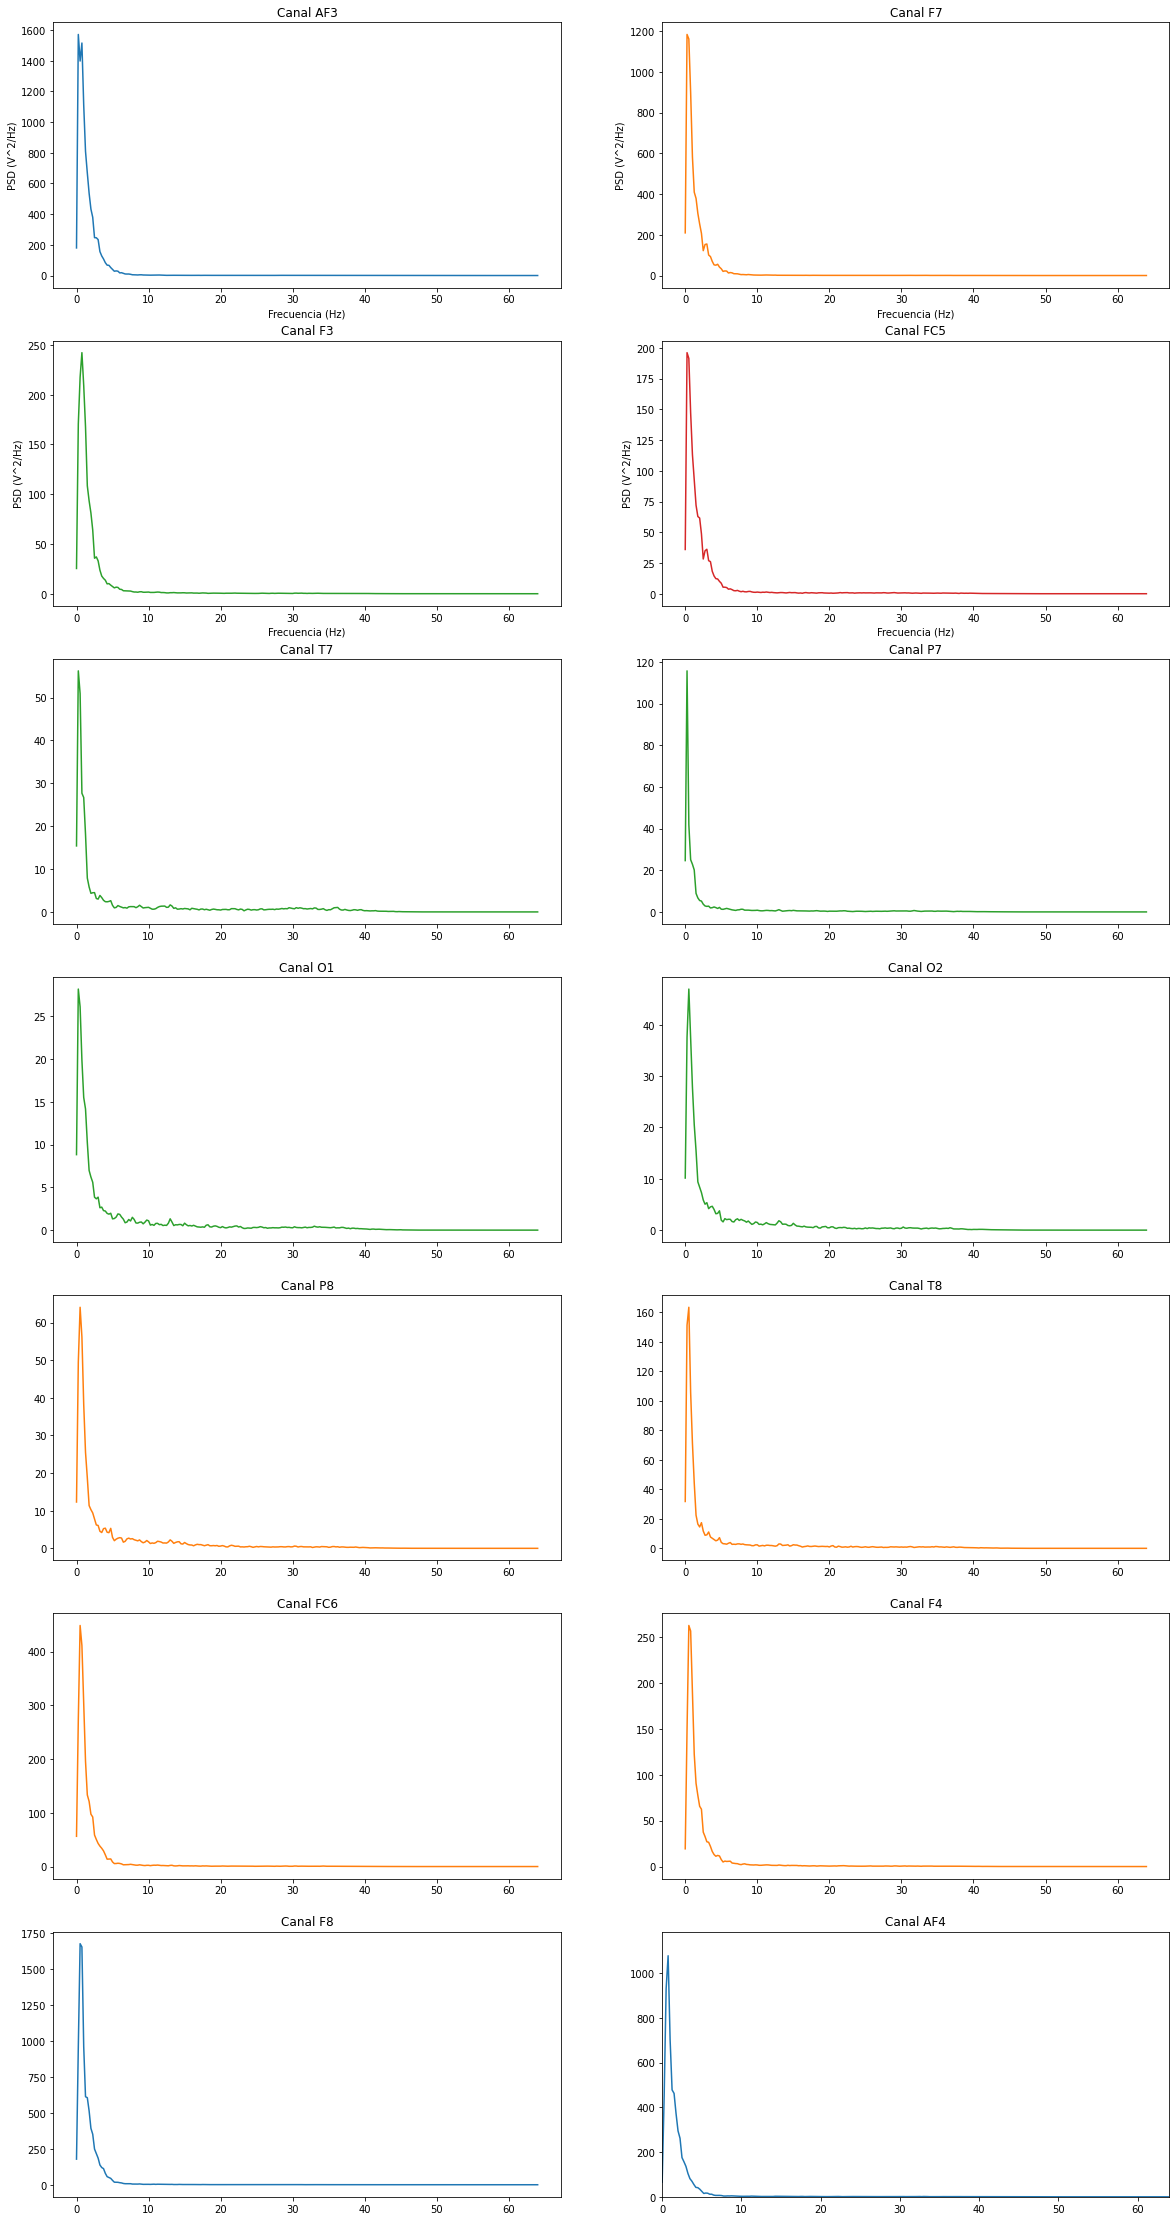

In [ ]:
fig, axs = plt.subplots(7, 2, figsize=(20, 40))

axs[0, 0].plot(freqs1, psd1)
plt.ylim([0, psd1.max() * 1.1])
plt.xlim([0, freqs1.max()])
axs[0, 0].set_title('Canal AF3')
axs[0,0].set(xlabel="Frecuencia (Hz)", ylabel="PSD (V^2/Hz)")

axs[0, 1].plot(freqs2, psd2, 'tab:orange')
plt.ylim([0, psd2.max() * 1.1])
plt.xlim([0, freqs2.max()])
axs[0, 1].set_title('Canal F7')
axs[0,1].set(xlabel="Frecuencia (Hz)", ylabel="PSD (V^2/Hz)")

axs[1, 0].plot(freqs3, psd3, 'tab:green')
plt.ylim([0, psd3.max() * 1.1])
plt.xlim([0, freqs3.max()])
axs[1, 0].set_title('Canal F3')
axs[1,0].set(xlabel="Frecuencia (Hz)", ylabel="PSD (V^2/Hz)")

axs[1, 1].plot(freqs4, psd4, 'tab:red')
plt.ylim([0, psd4.max() * 1.1])
plt.xlim([0, freqs4.max()])
axs[1, 1].set_title('Canal FC5')
axs[1,1].set(xlabel="Frecuencia (Hz)", ylabel="PSD (V^2/Hz)")
#-----------------------------------------------------------------------------

axs[2, 0].plot(freqs5, psd5, 'tab:green')
plt.ylim([0, psd5.max() * 1.1])
plt.xlim([0, freqs5.max()])
axs[2, 0].set_title('Canal T7')

axs[2, 1].plot(freqs6, psd6, 'tab:green')
plt.ylim([0, psd6.max() * 1.1])
plt.xlim([0, freqs6.max()])
axs[2, 1].set_title('Canal P7')

axs[3, 0].plot(freqs7, psd7, 'tab:green')
plt.ylim([0, psd7.max() * 1.1])
plt.xlim([0, freqs7.max()])
axs[3, 0].set_title('Canal O1')

axs[3, 1].plot(freqs8, psd8, 'tab:green')
plt.ylim([0, psd8.max() * 1.1])
plt.xlim([0, freqs8.max()])
axs[3, 1].set_title('Canal O2')
#-----------------------------------------------------------------------------

axs[4, 0].plot(freqs9, psd9, 'tab:orange')
plt.ylim([0, psd9.max() * 1.1])
plt.xlim([0, freqs9.max()])
axs[4, 0].set_title('Canal P8')


axs[4, 1].plot(freqs10, psd10, 'tab:orange')
plt.ylim([0, psd10.max() * 1.1])
plt.xlim([0, freqs10.max()])
axs[4, 1].set_title('Canal T8')


axs[5, 0].plot(freqs11, psd11, 'tab:orange')
plt.ylim([0, psd11.max() * 1.1])
plt.xlim([0, freqs11.max()])
axs[5, 0].set_title('Canal FC6')

axs[5, 1].plot(freqs12, psd12, 'tab:orange')
plt.ylim([0, psd12.max() * 1.1])
plt.xlim([0, freqs12.max()])
axs[5, 1].set_title('Canal F4')

#-----------------------------------------------------------------------------

axs[6, 0].plot(freqs13, psd13)
plt.ylim([0, psd13.max() * 1.1])
plt.xlim([0, freqs13.max()])
axs[6, 0].set_title('Canal F8')


axs[6, 1].plot(freqs14, psd14)
plt.ylim([0, psd14.max() * 1.1])
plt.xlim([0, freqs14.max()])
axs[6, 1].set_title('Canal AF4')



In [ ]:
picos1 = find_peaks(psd1, height=1, threshold=1, distance=1)

altura_picos1= picos1[1]['peak_heights']
pos_picos1= freqs1[picos1[0]]
#__________________________CANAL 2__________________________________________
picos2 = find_peaks(psd2, height=1, threshold=1, distance=1)

altura_picos2= picos2[1]['peak_heights']
pos_picos2= freqs2[picos2[0]]
#__________________________CANAL 3__________________________________________
picos3 = find_peaks(psd3, height=1, threshold=1, distance=1)

altura_picos3= picos3[1]['peak_heights']
pos_picos3= freqs3[picos3[0]]
#__________________________CANAL 4__________________________________________
picos4 = find_peaks(psd4, height=1, threshold=1, distance=1)

altura_picos4= picos4[1]['peak_heights']
pos_picos4= freqs4[picos4[0]]
#__________________________CANAL 5__________________________________________
picos5 = find_peaks(psd5, height=1, threshold=1, distance=1)

altura_picos5= picos5[1]['peak_heights']
pos_picos5= freqs5[picos5[0]]
#__________________________CANAL 6__________________________________________
picos6 = find_peaks(psd6, height=1, threshold=1, distance=1)

altura_picos6= picos6[1]['peak_heights']
pos_picos6= freqs6[picos6[0]]
#__________________________CANAL 7__________________________________________
picos7 = find_peaks(psd7, height=1, threshold=1, distance=1)

altura_picos7= picos7[1]['peak_heights']
pos_picos7= freqs7[picos7[0]]
#__________________________CANAL 8__________________________________________
picos8 = find_peaks(psd8, height=1, threshold=1, distance=1)

altura_picos8= picos8[1]['peak_heights']
pos_picos8= freqs8[picos8[0]]
#__________________________CANAL 9__________________________________________
picos9 = find_peaks(psd9, height=1, threshold=1, distance=1)

altura_picos9= picos9[1]['peak_heights']
pos_picos9= freqs9[picos9[0]]
#__________________________CANAL 10__________________________________________
picos10 = find_peaks(psd10, height=1, threshold=1, distance=1)

altura_picos10= picos10[1]['peak_heights']
pos_picos10= freqs10[picos10[0]]
#__________________________CANAL 11__________________________________________
picos11 = find_peaks(psd11, height=1, threshold=1, distance=1)

altura_picos11= picos11[1]['peak_heights']
pos_picos11= freqs11[picos11[0]]
#__________________________CANAL 12__________________________________________
picos12 = find_peaks(psd12, height=1, threshold=1, distance=1)

altura_picos12= picos12[1]['peak_heights']
pos_picos12= freqs12[picos12[0]]
#__________________________CANAL 13__________________________________________
picos13 = find_peaks(psd13, height=1, threshold=1, distance=1)

altura_picos13= picos13[1]['peak_heights']
pos_picos13= freqs13[picos13[0]]
#__________________________CANAL 14__________________________________________
picos14 = find_peaks(psd14, height=1, threshold=1, distance=1)

altura_picos14= picos14[1]['peak_heights']
pos_picos14= freqs14[picos14[0]]

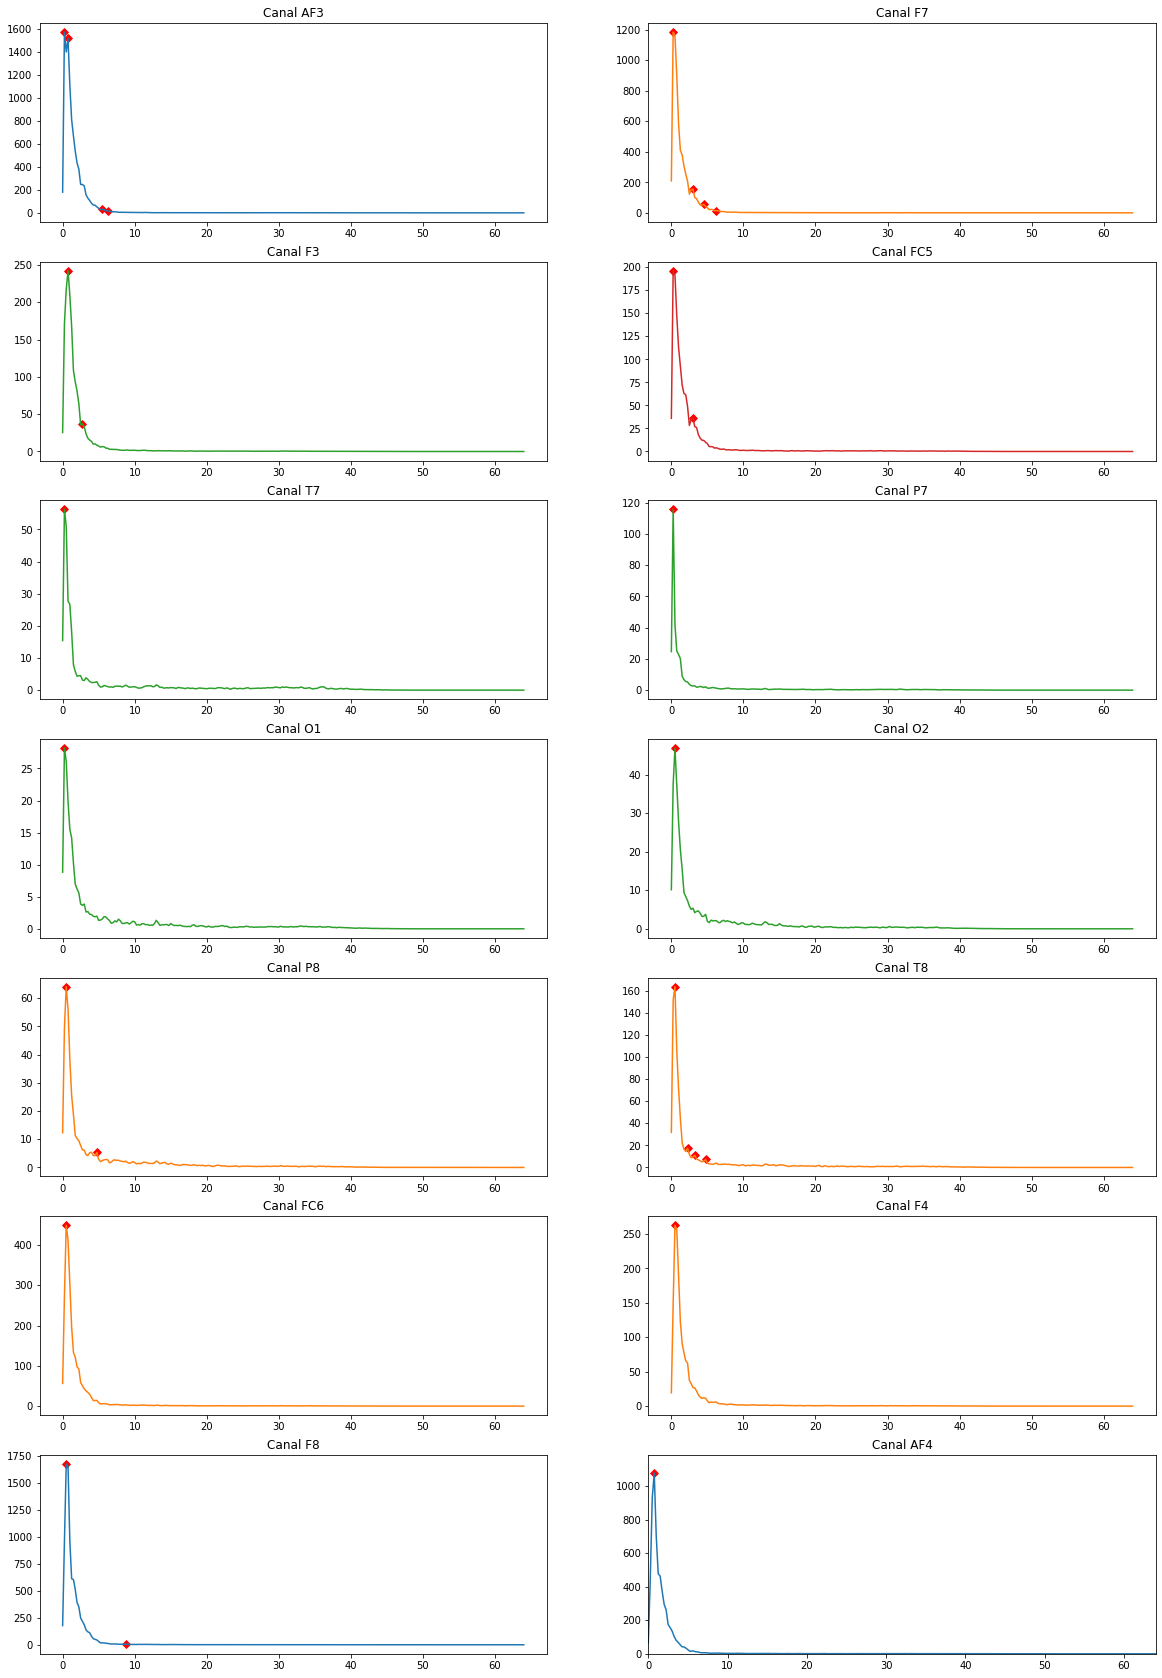

In [ ]:
fig, axs = plt.subplots(7, 2, figsize=(20, 30))

axs[0, 0].plot(freqs1, psd1)
plt.ylim([0, psd1.max() * 1.1])
plt.xlim([0, freqs1.max()])
axs[0, 0].set_title('Canal AF3')
axs[0, 0].scatter(pos_picos1, altura_picos1, color='r', s= 30, marker = 'D', label = 'Maximos')


axs[0, 1].plot(freqs2, psd2, 'tab:orange')
plt.ylim([0, psd2.max() * 1.1])
plt.xlim([0, freqs2.max()])
axs[0, 1].set_title('Canal F7')
axs[0, 1].scatter(pos_picos2, altura_picos2, color='r', s= 30, marker = 'D', label = 'Maximos')

axs[1, 0].plot(freqs3, psd3, 'tab:green')
plt.ylim([0, psd3.max() * 1.1])
plt.xlim([0, freqs3.max()])
axs[1, 0].set_title('Canal F3')
axs[1, 0].scatter(pos_picos3, altura_picos3, color='r', s= 30, marker = 'D', label = 'Maximos')

axs[1, 1].plot(freqs4, psd4, 'tab:red')
plt.ylim([0, psd4.max() * 1.1])
plt.xlim([0, freqs4.max()])
axs[1, 1].set_title('Canal FC5')
axs[1, 1].scatter(pos_picos4, altura_picos4, color='r', s= 30, marker = 'D', label = 'Maximos')
#-----------------------------------------------------------------------------

axs[2, 0].plot(freqs5, psd5, 'tab:green')
plt.ylim([0, psd5.max() * 1.1])
plt.xlim([0, freqs5.max()])
axs[2, 0].set_title('Canal T7')
axs[2, 0].scatter(pos_picos5, altura_picos5, color='r', s= 30, marker = 'D', label = 'Maximos')

axs[2, 1].plot(freqs6, psd6, 'tab:green')
plt.ylim([0, psd6.max() * 1.1])
plt.xlim([0, freqs6.max()])
axs[2, 1].set_title('Canal P7')
axs[2, 1].scatter(pos_picos6, altura_picos6, color='r', s= 30, marker = 'D', label = 'Maximos')

axs[3, 0].plot(freqs7, psd7, 'tab:green')
plt.ylim([0, psd7.max() * 1.1])
plt.xlim([0, freqs7.max()])
axs[3, 0].set_title('Canal O1')
axs[3, 0].scatter(pos_picos7, altura_picos7, color='r', s= 30, marker = 'D', label = 'Maximos')

axs[3, 1].plot(freqs8, psd8, 'tab:green')
plt.ylim([0, psd8.max() * 1.1])
plt.xlim([0, freqs8.max()])
axs[3, 1].set_title('Canal O2')
axs[3, 1].scatter(pos_picos8, altura_picos8, color='r', s= 30, marker = 'D', label = 'Maximos')
#-----------------------------------------------------------------------------

axs[4, 0].plot(freqs9, psd9, 'tab:orange')
plt.ylim([0, psd9.max() * 1.1])
plt.xlim([0, freqs9.max()])
axs[4, 0].set_title('Canal P8')
axs[4, 0].scatter(pos_picos9, altura_picos9, color='r', s= 30, marker = 'D', label = 'Maximos')


axs[4, 1].plot(freqs10, psd10, 'tab:orange')
plt.ylim([0, psd10.max() * 1.1])
plt.xlim([0, freqs10.max()])
axs[4, 1].set_title('Canal T8')
axs[4, 1].scatter(pos_picos10, altura_picos10, color='r', s= 30, marker = 'D', label = 'Maximos')


axs[5, 0].plot(freqs11, psd11, 'tab:orange')
plt.ylim([0, psd11.max() * 1.1])
plt.xlim([0, freqs11.max()])
axs[5, 0].set_title('Canal FC6')
axs[5, 0].scatter(pos_picos11, altura_picos11, color='r', s= 30, marker = 'D', label = 'Maximos')

axs[5, 1].plot(freqs12, psd12, 'tab:orange')
plt.ylim([0, psd12.max() * 1.1])
plt.xlim([0, freqs12.max()])
axs[5, 1].set_title('Canal F4')
axs[5, 1].scatter(pos_picos12, altura_picos12, color='r', s= 30, marker = 'D', label = 'Maximos')

#-----------------------------------------------------------------------------

axs[6, 0].plot(freqs13, psd13)
plt.ylim([0, psd13.max() * 1.1])
plt.xlim([0, freqs13.max()])
axs[6, 0].set_title('Canal F8')
axs[6, 0].scatter(pos_picos13, altura_picos13, color='r', s= 30, marker = 'D', label = 'Maximos')


axs[6, 1].plot(freqs14, psd14)
plt.ylim([0, psd14.max() * 1.1])
plt.xlim([0, freqs14.max()])
axs[6, 1].set_title('Canal AF4')
axs[6, 1].scatter(pos_picos14, altura_picos14, color='r', s= 30, marker = 'D', label = 'Maximos')



In [ ]:
#__________________________CANAL 2__________________________________________

#__________________________CANAL 3__________________________________________

#__________________________CANAL 4__________________________________________

#__________________________CANAL 5__________________________________________

#__________________________CANAL 6__________________________________________

#__________________________CANAL 7__________________________________________

#__________________________CANAL 8__________________________________________

#__________________________CANAL 9__________________________________________

#__________________________CANAL 10__________________________________________

#__________________________CANAL 11__________________________________________

#__________________________CANAL 12__________________________________________

#__________________________CANAL 13__________________________________________

#__________________________CANAL 14__________________________________________
